In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
result_path = '/content/drive/MyDrive/BSC/Ideas_on_counterfactuals/Results/results_diabetes (1).csv'
results_df = pd.read_csv(result_path)

In [ ]:
results_df

,Feature,Dissimilarity,DiCE Importance,SHAP Importance,LIME Importance,Pearson Correlation,Permutation Importance
0,Pregnancies,0.229566,0.1748,0.006384,0.133056,0.221898,0.025974
1,Glucose,0.185589,0.3578,0.002810,0.318405,0.466581,0.039610
2,BloodPressure,0.269329,0.1358,0.004329,0.014217,0.065068,0.007792
3,SkinThickness,0.247616,0.1836,0.004720,0.016571,0.074752,0.033766
4,Insulin,0.236607,0.1906,0.035018,0.017215,0.130548,0.003896
5,BMI,0.283659,0.1342,0.014626,0.140965,0.292695,0.018831
6,Pedigree,0.236086,0.1740,0.000889,0.052864,0.173844,0.010390
7,Age,0.212042,0.2348,0.005184,0.011030,0.238356,0.019481


<ipython-input-46-cb738620f13e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y=metric, data=results_df, ax=axes[i], palette='viridis')
<ipython-input-46-cb738620f13e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y=metric, data=results_df, ax=axes[i], palette='viridis')
<ipython-input-46-cb738620f13e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y=metric, data=results_df, ax=axes[i], palette='viridis')
<ipython-input-46-cb738620f13e>:11: FutureWarning: 

Passing `palette` without assigning

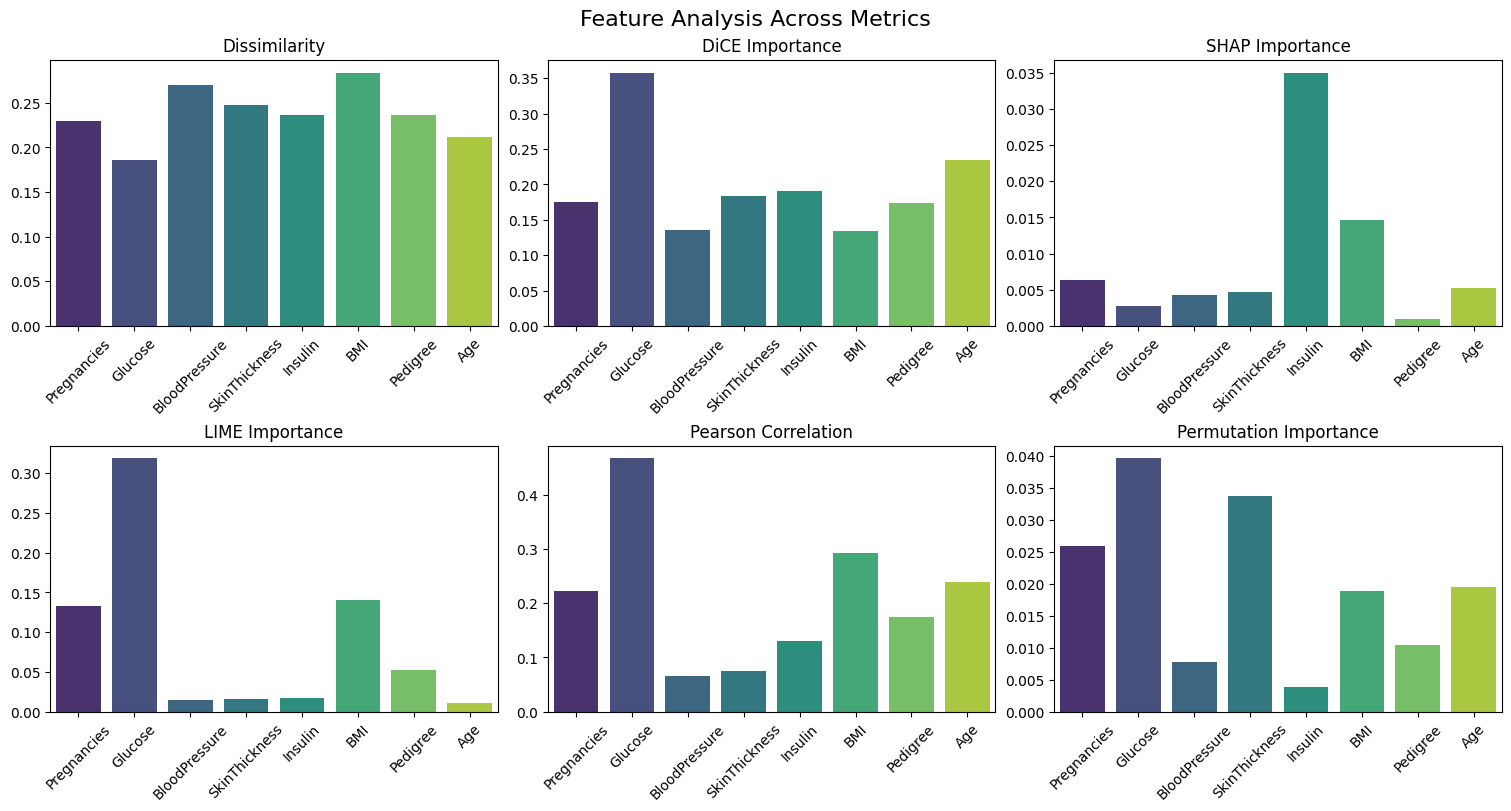

In [ ]:
metrics = ['Dissimilarity', 'DiCE Importance', 'SHAP Importance', 'LIME Importance', 'Pearson Correlation',	'Permutation Importance']
num_metrics = len(metrics)
results_df[metrics] = results_df[metrics].abs() # otherwise we cannot compare
fig, axes = plt.subplots(2, 3, figsize=(15, 8), constrained_layout=True)
axes = axes.ravel()

for i, metric in enumerate(metrics):
    sns.barplot(x='Feature', y=metric, data=results_df, ax=axes[i], palette='viridis')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_title(metric)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

for j in range(num_metrics, len(axes)):
    axes[j].axis('off')

plt.suptitle('Feature Analysis Across Metrics', fontsize=16)
plt.show()

### Convert to LaTeX code

In [ ]:
latex_code = results_df.to_latex(index=False)
print(latex_code)

\begin{tabular}{lrrrrrr}
\toprule
Feature & Dissimilarity & DiCE Importance & SHAP Importance & LIME Importance & Pearson Correlation & Permutation Importance \\
\midrule
age & 0.310265 & 0.242600 & -1.074923 & -0.032082 & -0.229324 & -0.007805 \\
sex & 0.714655 & 0.561200 & -0.242341 & -0.267094 & -0.279501 & 0.035610 \\
cp & 0.822264 & 0.793400 & -0.772315 & -0.258588 & 0.434854 & 0.023415 \\
trestbps & 0.512483 & 0.135800 & 3.917459 & 0.099770 & -0.138772 & -0.020488 \\
chol & 0.462853 & 0.156600 & -0.907916 & -0.016388 & -0.099966 & -0.010244 \\
fbs & 0.318435 & 0.117000 & 0.001464 & 0.016551 & -0.041164 & 0.000000 \\
restecg & 0.551675 & 0.261200 & -0.089746 & -0.054682 & 0.134468 & -0.004390 \\
thalach & 0.582921 & 0.516600 & -22.026003 & -0.126994 & 0.422895 & -0.010244 \\
exang & 0.604392 & 0.346400 & -0.336086 & -0.173920 & -0.438029 & -0.018049 \\
oldpeak & 0.350887 & 0.215600 & -0.794898 & -0.210574 & -0.438441 & 0.016098 \\
slope & 0.645632 & 0.384600 & -0.508091 & -0.12598

### Feature Agreement Measure

In [ ]:
def feature_agreement(features, vect_1, vect_2, k):
    # we create the dictionary
    dict_1 = {}
    dict_2 = {}
    for i in range(len(features)):
        dict_1[features[i]] = vect_1[i]
        dict_2[features[i]] = vect_2[i]

    sorted_dict_1 = dict(sorted(dict_1.items(), key=lambda item: item[1], reverse=True))
    sorted_dict_2 = dict(sorted(dict_2.items(), key=lambda item: item[1], reverse=True))

    # Extract the top-k features
    top_k_1 = list(sorted_dict_1.keys())[:k]
    top_k_2 = list(sorted_dict_2.keys())[:k]

    # Compute the fraction of common features (order preserved in intersection)
    common_features = [f for f in top_k_1 if f in top_k_2]
    feat_agreement = len(common_features) / k

    return feat_agreement

Now we perform the two above metrics along with pearson correlation for the various dataset for the metrics we computed. For SHAP and LIME we take the absolute value as DiCE and $d_1$ just attains positive value and they do not encode the direction of the influence w.r.t. the output

In [ ]:
def compute_agreement_matrix(df, metrics, k):

    n = len(metrics)
    agreement_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                agreement_matrix[i][j] = 1.0  # Perfect agreement with itself
            else:
                agreement_matrix[i][j] = feature_agreement(
                    df['Feature'].values,
                    df[metrics[i]].values,
                    df[metrics[j]].values,
                    k
                )
    names = ['d_1', 'DiCE', 'SHAP', 'LIME']
    return pd.DataFrame(agreement_matrix, index=names, columns=names)

metrics = ['Dissimilarity',	'DiCE Importance',	'SHAP Importance',	'LIME Importance']

k = 4
# convert SHAP and LIME in abs
results_df['SHAP Importance'] = results_df['SHAP Importance'].abs()
results_df['LIME Importance'] = results_df['LIME Importance'].abs()

agreement_matrix = compute_agreement_matrix(results_df, metrics, k)

print(agreement_matrix)


       d_1  DiCE  SHAP  LIME
d_1   1.00  0.75  0.00   0.5
DiCE  0.75  1.00  0.25   0.5
SHAP  0.00  0.25  1.00   0.0
LIME  0.50  0.50  0.00   1.0


In [ ]:
# Now the same for the other two datasets: Diabetes
result_path = '/content/drive/MyDrive/BSC/Ideas_on_counterfactuals/Results/results_diabetes (1).csv'
results_df = pd.read_csv(result_path)

In [ ]:
results_df['SHAP Importance'] = results_df['SHAP Importance'].abs()
results_df['LIME Importance'] = results_df['LIME Importance'].abs()

agreement_matrix = compute_agreement_matrix(results_df, metrics, k)
print(agreement_matrix)

       d_1  DiCE  SHAP  LIME
d_1   1.00  0.50   0.5  0.25
DiCE  0.50  1.00   0.5  0.25
SHAP  0.50  0.50   1.0  0.50
LIME  0.25  0.25   0.5  1.00


In [ ]:
result_path = '/content/drive/MyDrive/BSC/Ideas_on_counterfactuals/Results/results_depression.csv'
results_df = pd.read_csv(result_path)

In [ ]:
metrics = ['Dissimilarity',	'DiCE Importance',	'SHAP Importance',	'Lime Importance'] # for depression is Lime and not LIME

results_df['SHAP Importance'] = results_df['SHAP Importance'].abs()
results_df['Lime Importance'] = results_df['Lime Importance'].abs()

agreement_matrix = compute_agreement_matrix(results_df, metrics, k)
print(agreement_matrix)

       d_1  DiCE  SHAP  LIME
d_1   1.00  0.25  0.25  0.50
DiCE  0.25  1.00  0.50  0.25
SHAP  0.25  0.50  1.00  0.75
LIME  0.50  0.25  0.75  1.00
